## Introduction to Plotting in Python

Week 7, Class 2 (May 11th, 2022)

Using matplotlib, we'll start with plotting 1D data, and move on to 2D next week

We'll use some example data from the Mauna Loa observatory 

In [18]:
## As always, import packages:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

## Makes plots in the notebook interactive (can click, zoom, pan)
%matplotlib notebook

In [19]:
## Define the path to the data file:
datapath = 'C:\\Users\\vjs\\data_for_class\\maunaloa_weekly_windows.csv'

## Import the data with pandas
maunaloa_df = pd.read_csv(datapath,header=43,names=['Date','CO2'])  ## names specifies the column names

## Print the dataframe to look at it
print(maunaloa_df)
## List the column names
list(maunaloa_df)

            Date     CO2
0     1958-03-29  316.19
1     1958-04-05  317.31
2     1958-04-12  317.69
3     1958-04-19  317.58
4     1958-04-26  316.48
...          ...     ...
3133  2019-08-24  409.52
3134  2019-08-31  409.32
3135  2019-09-07  408.80
3136  2019-09-14  408.49
3137  2019-09-21  408.50

[3138 rows x 2 columns]


['Date', 'CO2']

In [20]:
## Pandas reminders:
## there are two ways to pull out the data from one column.
##  1. df.columnname (only works when the column name DOES NOT have spaces or symbols)
maunaloa_df.Date

0       1958-03-29
1       1958-04-05
2       1958-04-12
3       1958-04-19
4       1958-04-26
           ...    
3133    2019-08-24
3134    2019-08-31
3135    2019-09-07
3136    2019-09-14
3137    2019-09-21
Name: Date, Length: 3138, dtype: object

In [21]:
##    2. df['columnname'] (can use this one any time, but this is the only method to use if the column name has a symbol or space)
maunaloa_df['CO2']

0       316.19
1       317.31
2       317.69
3       317.58
4       316.48
         ...  
3133    409.52
3134    409.32
3135    408.80
3136    408.49
3137    408.50
Name: CO2, Length: 3138, dtype: float64

In [22]:
## Reference just the first row of the dataframe?

maunaloa_df.loc[0]

Date    1958-03-29
CO2         316.19
Name: 0, dtype: object

In [23]:
## Inspect one of the dates
maunaloa_df.Date[0]

'1958-03-29'

The date column is filled with a bunch of strings, which is inconvient for plotting.

We want these to be datetime objects. To get datetime objects into a column in our dataframe, we will:
    1. Make an empty array of zeros to fill (eventually) with datetime objects
    2. Loop through every row in the dataframe and convert the date string to a date object; then fill the datetime array with this
    3. Replace the date column in the dataframe with our new array with datetime objects 

In [24]:
## Step 1: Make empty array to fill with datetime objects
## This makes an array filled with zeros that has the same shape as the Date column
##    specifically - maunaloa_df.Date.values turns the Date column into an array
datetimes = np.zeros_like(maunaloa_df.Date.values) 
print(datetimes) ## convince ourselves that this is an array of zeros...


## Step 2: Loop through the dataframe and convert each date string to a date object; fill datetimes array with these

## Specify the format of our dates for the datetime conversion:
datetime_format = '%Y-%m-%d'
    ## %Y specifies a 4 digit year
    ## %m specifies a 2 digit, zero padded month
    ## %d specifies a 2 digit, zero padded day
    ## - separates year from month, month from day in our strings

## Loop over the index of our dates (i.e., 0 to the length of the datetimes array or Date column)
for i_index in range(len(datetimes)):
    ## Get the date at this index/position, as a string:
    i_date = maunaloa_df.Date[i_index]
    
    ## convert i_date to a datetime object
    i_datetime = datetime.strptime(i_date,datetime_format)
    
    ## Put this in the datetimes array at the i_index position
    datetimes[i_index] = i_datetime
    
print(datetimes)

[0 0 0 ... 0 0 0]
[datetime.datetime(1958, 3, 29, 0, 0) datetime.datetime(1958, 4, 5, 0, 0)
 datetime.datetime(1958, 4, 12, 0, 0) ...
 datetime.datetime(2019, 9, 7, 0, 0) datetime.datetime(2019, 9, 14, 0, 0)
 datetime.datetime(2019, 9, 21, 0, 0)]


In [25]:
## Step 3: Replace the Date column in our dataframe with this new array

maunaloa_df['Date'] = datetimes

print(maunaloa_df)

           Date     CO2
0    1958-03-29  316.19
1    1958-04-05  317.31
2    1958-04-12  317.69
3    1958-04-19  317.58
4    1958-04-26  316.48
...         ...     ...
3133 2019-08-24  409.52
3134 2019-08-31  409.32
3135 2019-09-07  408.80
3136 2019-09-14  408.49
3137 2019-09-21  408.50

[3138 rows x 2 columns]


## Finally on to plotting....

<IPython.core.display.Javascript object>


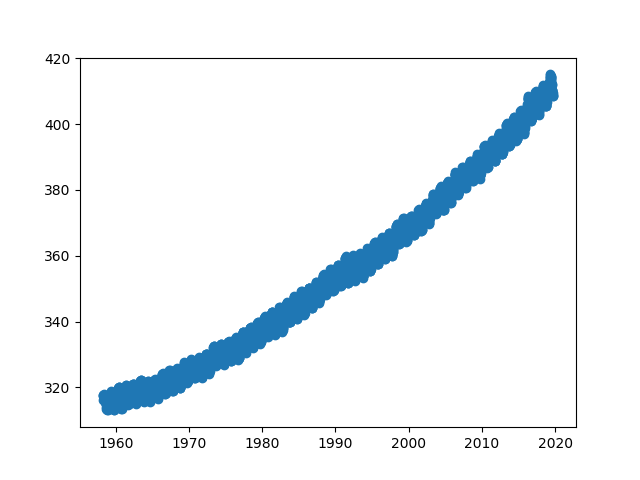

In [26]:
## Start off by making a figure
plt.figure()
plt.scatter(maunaloa_df.Date,maunaloa_df.CO2)

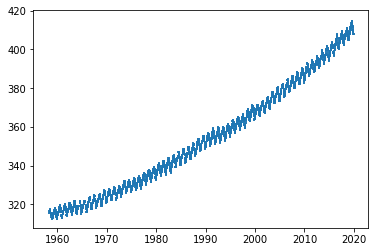

In [11]:
## Is this a good plot? No, it's horrible...

## Can't see datapoints, can't see seasonal variations, etc.

## First thing: change the symbol size
plt.figure()
plt.scatter(maunaloa_df.Date,maunaloa_df.CO2,s=1,marker='s')

<IPython.core.display.Javascript object>


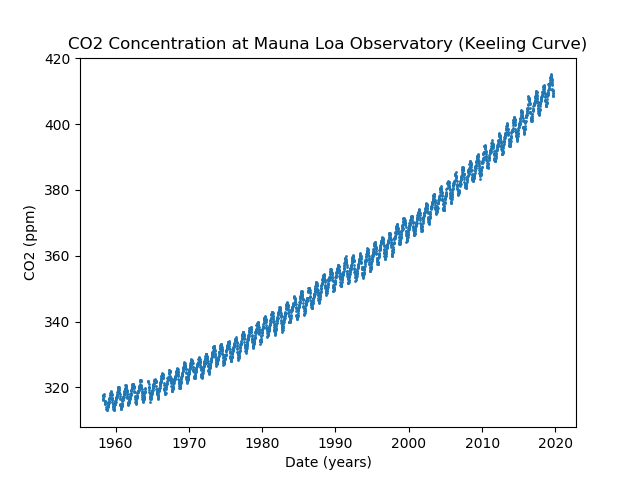

Text(0.5, 1.0, 'CO2 Concentration at Mauna Loa Observatory (Keeling Curve)')

In [27]:
## No axis labels!
plt.figure()
plt.scatter(maunaloa_df.Date,maunaloa_df.CO2,s=1)
plt.xlabel('Date (years)')
plt.ylabel('CO2 (ppm)')
plt.title('CO2 Concentration at Mauna Loa Observatory (Keeling Curve)')

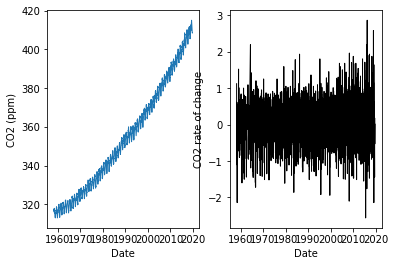

In [13]:
## something useful to show that the rate is exponential is looking at the rate of change.
rate_change = np.diff(maunaloa_df.CO2)

## Make two subplots: one with data, one with rate of change.
plt.figure(0)

## Make two subplots.
## Left: data
plt.subplot(1,2,1) ## pyplot starts at 1 for the subplot command, not 0.....sigh...
plt.plot(maunaloa_df.Date,maunaloa_df.CO2,linewidth=1)
plt.xlabel('Date')
plt.ylabel('CO2 (ppm)')

## Right: plot the rate
plt.subplot(1,2,2)  ## nrows=1, ncols=2, index=2 second supblot
plt.plot(maunaloa_df.Date[1:],rate_change,linewidth=1,color='black')
plt.xlabel('Date')
plt.ylabel('CO2 rate of change')

plt.subplots_adjust(hspace=1)  ## adds horizontal space between subplots in theory

[314.         314.01917808 314.03835616 ... 374.12328767 374.14246575
 374.16164384]


<IPython.core.display.Javascript object>


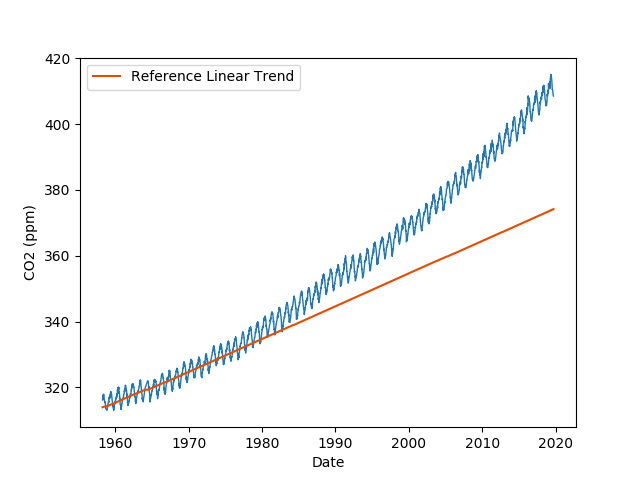

In [28]:
## This is kind of useful, but shows us more the seasonality, not the exponential rate of change.
## Make a fake x for a reference line.

dt=7 # data point spacing, every 7 days like the data file
days = np.arange(0,len(maunaloa_df.Date)*dt,dt) ## make an array that represents the days since the start of the data
##  starts at 0, goes to the total number of poitsn * point spacing, separated every 7 days
years = days/365 ## convert to years - our reference x

yreference = 1*years + 314  #y = mx + b
print(yreference)

## Replot, with the reference linear line
plt.figure()
plt.plot(maunaloa_df.Date,maunaloa_df.CO2,linewidth=1) ## plot the data
plt.plot(maunaloa_df.Date,yreference,c='#E64C00',label='Reference Linear Trend') ## plot refernece line
plt.xlabel('Date')
plt.ylabel('CO2 (ppm)')

## Add a legend:
plt.legend()

This is becoming more useful. What does it best demonstrate right now?

...probably the deviation from the linear trend, gets larger and larger as time goes on.

This means that the increase in CO2 is exponential.

What if we could visually show how that amount changes? 

We could plot vertical lines on the left vs. right hand side of the plots showing the difference between the linear trend, and the data. 

We could also fill in the area between the observations and the reference line. We'll do this below, it uses the function "fill between"

<IPython.core.display.Javascript object>


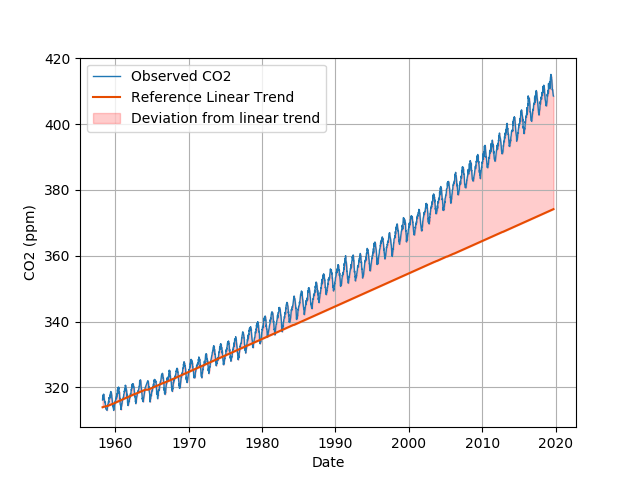

In [29]:
## Replot, with the reference linear line, and filling in between
plt.figure()

## color the area between observations and reference line.
## Give fill_between: x array, and 2 y arrays to fill between
plt.fill_between(maunaloa_df.Date,yreference,maunaloa_df.CO2,color='red',alpha=0.2,label='Deviation from linear trend')
## Use alpha to indicate transparency; alpha=1 is full opaque, alpha=0 is transparent

plt.plot(maunaloa_df.Date,maunaloa_df.CO2,linewidth=1,label='Observed CO2') ## plot the data
plt.plot(maunaloa_df.Date,yreference,c='#E64C00',label='Reference Linear Trend') ## plot refernece line

## Add a grid:
plt.grid()

plt.xlabel('Date')
plt.ylabel('CO2 (ppm)')

## Add a legend:
plt.legend()

Getting a lot beter! From the perspective of climate change, we want to use these data to show:

    1. CO2 is increasing in a remote area
    2. The increase is exponential over time
    
The last important fact isn't shown on here yet, and is that 

    3. 400 ppm is a CO2 concentration that we know from other paleoclimate data, is a concentration that has not been exceeded in at least the last 4,000,000 years. 

Let's add this to the plot somehow to demonsrate this point.

<IPython.core.display.Javascript object>


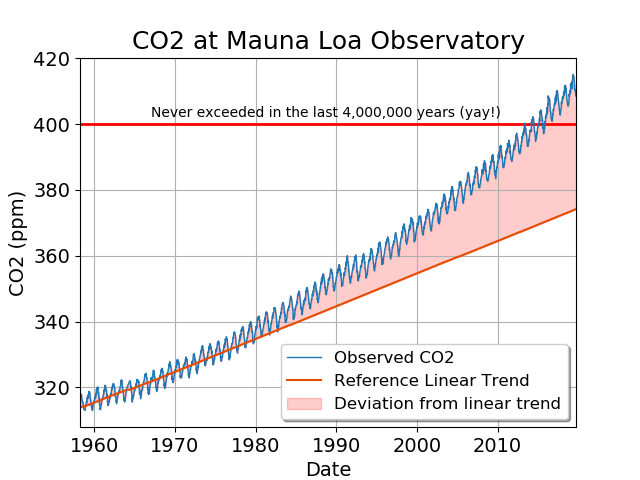

In [52]:
## Replot, with the reference linear line, and filling in between
plt.figure()

## color the area between observations and reference line.
## Give fill_between: x array, and 2 y arrays to fill between
plt.fill_between(maunaloa_df.Date,yreference,maunaloa_df.CO2,color='red',alpha=0.2,label='Deviation from linear trend')
## Use alpha to indicate transparency; alpha=1 is full opaque, alpha=0 is transparent

plt.plot(maunaloa_df.Date,maunaloa_df.CO2,linewidth=1,label='Observed CO2') ## plot the data
plt.plot(maunaloa_df.Date,yreference,c='#E64C00',label='Reference Linear Trend') ## plot refernece line

## ADd a horizontal line at 400ppm showing that we have surpassed this concentration:
plt.hlines(400,maunaloa_df.Date.values[0],maunaloa_df.Date.values[-1],lw=2,color='r')

## Add text to annotate the horizontal line:
plt.annotate(s='Never exceeded in the last 4,000,000 years (yay!)',xy=(datetime(1967,1,1),402))

## Add a grid:
plt.grid()

plt.xlabel('Date',fontsize=14)
plt.ylabel('CO2 (ppm)',fontsize=14)

## Add a legend:
plt.legend(loc=4,shadow=True,fontsize=12)

## Change limits of the plot:
plt.xlim([maunaloa_df.Date.values[0],maunaloa_df.Date.values[-1]])

## Give it a title:
plt.title('CO2 at Mauna Loa Observatory',fontsize=18)

## change the size of the tick labels:
plt.gca().tick_params(labelsize=14)

## plt.gca() gets the axes object that our data are plotted on
## .tick_params changes the tick parameters on that axes object


## Save to a file:
## First, specify where to write it...
figure_path = 'C://Users//vjs//figures_from_class_spring2022//keelingcurve.pdf'
## Then write it out to file:
plt.savefig(figure_path)